#### Qlunc tutorial by Francisco Costa
# **Tutorial 2**
## Calculate line of sight wind velocity ($V_{LOS}$) and horizontal wind velocity ($V_{h}$) uncertainties

This tutorial aims to facilitate the use to Qlunc. 
In this tutorial will deal with the new capabilities of Qlunc, namely $V_{LOS}$ (one single lidar) and $V_{h}$ (two lidars) uncertainty estimations. To quantitatively verify the results a comparison between Montecarlo simulations and an analytical model (GUM approach) is performed.

* **Some steps are not deeply explained since it is not necessary for the sake of this tutorial. The main goal of the present tutorial is to show how to calculate the uncertainty of $V_{LOS}$ and how to combine two lidars to calculate the uncertainty in $V_{h}$.**

First we import the necessary python packages and Qlunc functions:

In [1]:
import os
os.chdir('../')
# importing  uncertainty functions
import UQ_Functions.UQ_Vhorizontal_Classes as uVhc, UQ_Functions.UQ_Photonics_Classes as uphc,UQ_Functions.UQ_Optics_Classes as uopc, UQ_Functions.UQ_Power_Classes as upwc,UQ_Functions.UQ_Lidar_Classes as ulc, UQ_Functions.UQ_ProbeVolume_Classes as upbc,UQ_Functions.UQ_Data_processing_Classes as uprm, UQ_Functions.UQ_SignalProcessor_Classes as uspc
from Utils.Qlunc_ImportModules import *

### Obtaining lidar and measuring set up parameters from the yaml inputs file

A [.yml template](https://github.com/PacoCosta/Qlunc/blob/Qlunc-V0.9/Main/Template_yaml_inputs_file.yml) is included in the repository. This tutorial uses two different yaml files to create two lidars '**Caixa1**' and '**Caixa2**'. 

The code below imports the `yaml` files:

In [2]:
# Read yaml files corresponding to the 1 and 2

# Data for Lidar1 ('Caixa1')
with open (r'./Tutorials/yaml_inputs_file_2_1.yml','r') as file:
    Qlunc_yaml_inputs1={}
    docs = yaml.load_all(file, Loader=yaml.FullLoader)
    for doc in docs:      
        for k, v in doc.items():     
            Qlunc_yaml_inputs1.setdefault(k,v)

# Data for Lidar1 ('Caixa2')
with open (r'./Tutorials/yaml_inputs_file_2_2.yml','r') as file:
    Qlunc_yaml_inputs2={}
    docs = yaml.load_all(file, Loader=yaml.FullLoader)
    for doc in docs:      
        for k, v in doc.items():     
            Qlunc_yaml_inputs2.setdefault(k,v)

In [3]:
# Execute Qlunc_Classes.py (creating classes for lidar 'objects'):
#exec(open(Qlunc_yaml_inputs1['Main directory']+'/Tutorials/WorkingExample_Tutorial.py').read())

### Create the lidar objects

To create the lidar objects we need to instantiate the python classes actually representing the lidar components. See Tutorial1 to see how to instantiate the lidar components in Qlunc. 

The lidar characteristics have been declared in the corresponding yaml files `yaml_inputs_file_2_1` and `yaml_inputs_file_2_2`. The code below instantiates and creates the lidar devices: 

In [4]:
%run -i ./Tutorials/Qlunc_Instantiate_Tutorial2_file_1.py
%run -i ./Tutorials/Qlunc_Instantiate_Tutorial2_file_2.py

C:\SWE_LOCAL\GIT_Qlunc
C:\SWE_LOCAL\GIT_Qlunc
Created new scanner: Scanner_Yaml1
Created new optical circulator: OC_Yaml1
Created new telescope: Telescope_YAML_zr1
Class "Probe volume" created
Created new optic module: Optics_module_Yaml1
Created new AOM: AOM_YAML1
Created new optical amplifier: OA_Yaml1
Created new photodetector: Photodetector_YAML1
Created new laser: Laser_YAML1
Created new photonic module: Photonics_module_Yaml1
Created new ADC: ADC_Yaml1
Created new signal processor module: Signal_processor_module_Yaml1
Created new lidar general inputs: Lidar_gral_inputs_Yaml1
Selected wfr model: None terrain
Selected filtering model: CNR 
Created new lidar device: Caixa1
Created new atmosphere: Atmosphere_Yaml1
C:\SWE_LOCAL\GIT_Qlunc
C:\SWE_LOCAL\GIT_Qlunc
Created new scanner: Scanner_Yaml2
Created new optical circulator: OC_Yaml2
Created new telescope: Telescope_YAML_zr2
Class "Probe volume" created
Created new optic module: Optics_module_Yaml2
Created new AOM: AOM_YAML2
Created 

### $V_{LOS}$  uncertainty estimation

If we create one single lidar we can ask for the uncertainty in $V_{LOS}$ when using a specific measurement configuration. We do this using dot notation, icluding the data from the yaml file that corresponds to the lidar with which we want to sample the wind.

C:\SWE_LOCAL\GIT_Qlunc\UQ_Functions\UQ_Photonics_Classes.py:163: RuntimeWarning: divide by zero encountered in log10
  OSNR_plot = 10*np.log10(((Lidar.photonics.optical_amplifier.Power_interval)/(NF_w*cts.h*(cts.c/Lidar.lidar_inputs.Wavelength)*Lidar.photonics.optical_amplifier.OA_BW))/1000)
C:\SWE_LOCAL\GIT_Qlunc\Utils\Qlunc_Help_standAlone.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data=np.array(data)


Processing lidar uncertainties...
There is NO TIA component in the photodetector
> c:\swe_local\git_qlunc\uq_functions\uq_optics_classes.py(109)UQ_Scanner()
    107 
    108     pdb.set_trace()
--> 109     x_Lidar1,y_Lidar1,z_Lidar1,lidars=[],[],[],[]
    110     lidars={}
    111 

ipdb> c


C:\SWE_LOCAL\GIT_Qlunc\Utils\Qlunc_Help_standAlone.py:486: RuntimeWarning: invalid value encountered in power
  VLOS1 = Vref*(((Hl+(np.sin(theta)*rho))/Href)**alpha[0])*(np.cos(theta)*np.cos(psi-wind_direction[ind_wind_dir])) #-np.sin(theta_corr[0][ind_npoints])*np.tan(wind_tilt[ind_npoints])


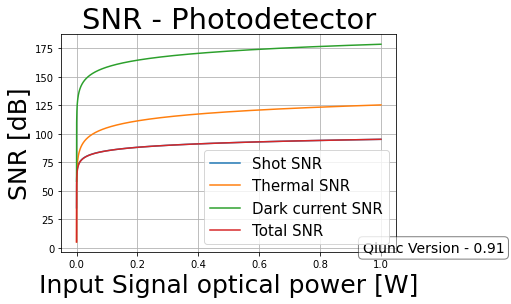

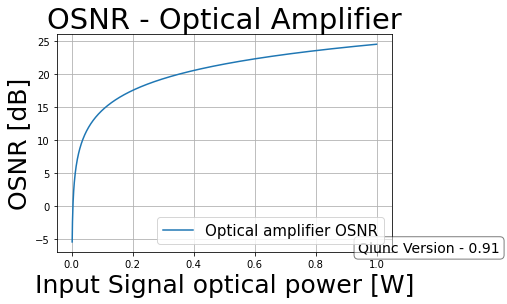

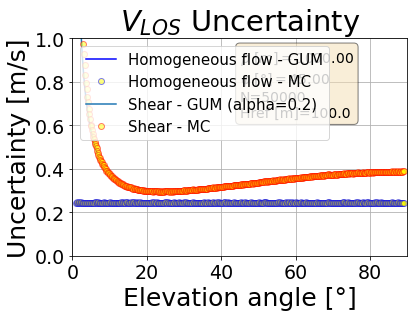

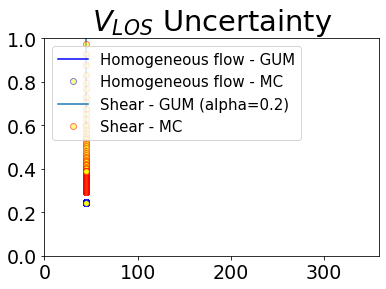

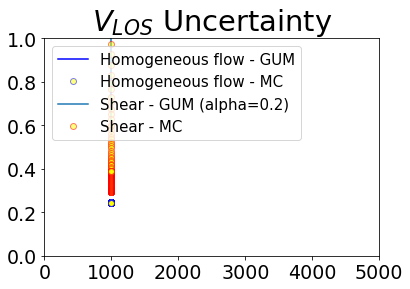

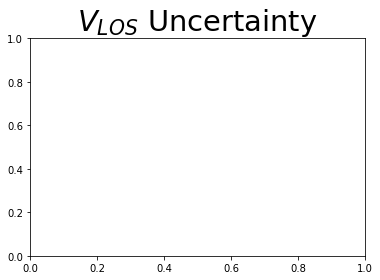

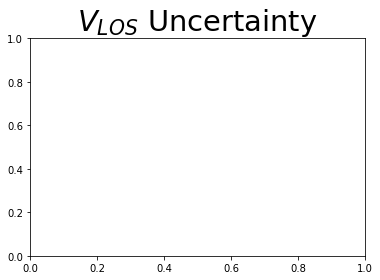

You didn´t include a power module in  the lidar
...Lidar uncertainty done. Lidar saved in folder "Projects"


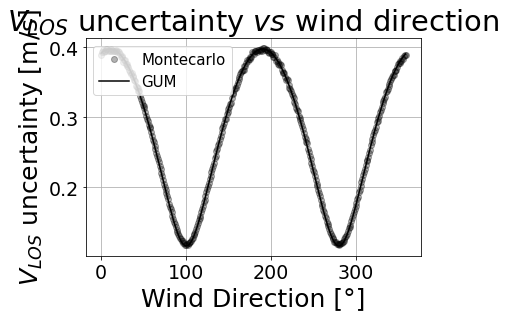

In [5]:
U_VLOS_Caixa1=Lidar.Uncertainty(Lidar, Atmospheric_Scenario,cts,Qlunc_yaml_inputs1)


In [ ]:
U_VLOS_Caixa2=Lidar.Uncertainty(Lidar, Atmospheric_Scenario,cts,Qlunc_yaml_inputs2)

C:\SWE_LOCAL\GIT_Qlunc\UQ_Functions\UQ_Photonics_Classes.py:163: RuntimeWarning: divide by zero encountered in log10
  OSNR_plot = 10*np.log10(((Lidar.photonics.optical_amplifier.Power_interval)/(NF_w*cts.h*(cts.c/Lidar.lidar_inputs.Wavelength)*Lidar.photonics.optical_amplifier.OA_BW))/1000)
C:\SWE_LOCAL\GIT_Qlunc\Utils\Qlunc_Help_standAlone.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data=np.array(data)


Processing lidar uncertainties...
There is NO TIA component in the photodetector
> c:\swe_local\git_qlunc\uq_functions\uq_optics_classes.py(109)UQ_Scanner()
    107 
    108     pdb.set_trace()
--> 109     x_Lidar1,y_Lidar1,z_Lidar1,lidars=[],[],[],[]
    110     lidars={}
    111 



### $V_{h}$  uncertainty estimation

When creating a lidar it is stored in the folder `Projects`, in the local repository, with the name provided by the user in the yaml file. In the case of this Tutorial we have created two lidars with names '**Caixa1**' and '**Caixa2**'. Different lidars can be saved at the same location. 

**Warning**: Be aware of the characteristics of each lidar and their measuring setup, when creating them. For example, if different correlation terms are used whe instantiating the lidars we want to compare or we change the scanning pattern, the framework will rise missleading results.

Following the given notation below we can obtain the uncertainty in the horizontal velocity:

In [ ]:
U_VH_Caixa1_Caixa2=Lidar.Uncertainty_Vh(Lidar, Atmospheric_Scenario,cts,Qlunc_yaml_inputs2,['Caixa1','Caixa2'])